In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4762,ham,Prepare to be pleasured :),NaN,NaN,NaN
1880,ham,Just seeing your missed call my dear brother. ...,NaN,NaN,NaN
5230,ham,"Nope, I'm still in the market",NaN,NaN,NaN
2998,ham,"Oh, then your phone phoned me but it disconnected",NaN,NaN,NaN
4472,ham,S but not able to sleep.,NaN,NaN,NaN


In [4]:
df=df.drop('Unnamed: 2',axis=1)

In [5]:
df=df.drop('Unnamed: 3',axis=1)
df=df.drop('Unnamed: 4',axis=1)

In [6]:
df.sample(5)

,v1,v2
2228,ham,Those were my exact intentions
4852,ham,I'm fine. Hope you are also
5444,ham,Good morning. At the repair shop--the ONLY rea...
4580,ham,Not course. Only maths one day one chapter wit...
3232,ham,Height of recycling: Read twice- People spend ...


In [7]:
(df['v1'].isnull()==True).count()

5572

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
4114,ham,Sorry. You never hear unless you book it. One ...
5217,ham,Well thats nice. Too bad i cant eat it
4028,ham,"[Û_] anyway, many good evenings to u! s"
33,ham,For fear of fainting with the of all that hous...
2505,ham,Congrats kano..whr s the treat maga?


In [11]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [12]:
df['target']=e.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
373,0,I cant keep talking to people if am not sure i...
1580,0,"I shall book chez jules for half eight, if tha..."
2357,0,Okay same with me. Well thanks for the clarifi...
783,1,You have an important customer service announc...
3778,1,"Claim a 200 shopping spree, just call 08717895..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

In [18]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def transform(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [20]:
transform(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [21]:
df['transformed_text']=df['text'].apply(transform)

In [22]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [23]:
from wordcloud import WordCloud

In [24]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [25]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

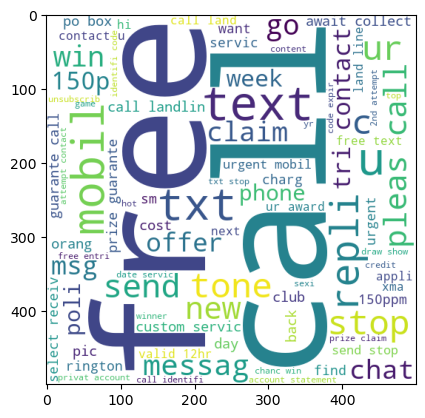

In [26]:
plt.imshow(spam_wc)

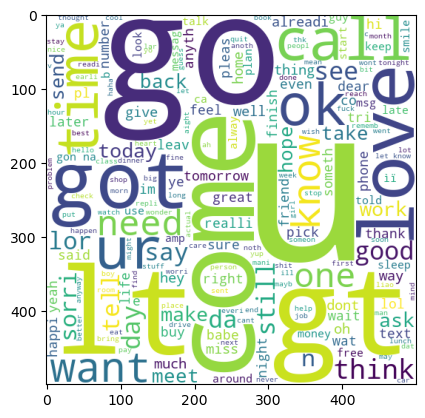

In [27]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf=TfidfVectorizer()
cv=CountVectorizer()

In [29]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [30]:
X.shape

(5169, 6708)

In [31]:
y=df['target'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [35]:
gnb=GaussianNB()
gnb.fit(Xtrain,ytrain)
ypred1=gnb.predict(Xtest)
print(accuracy_score(ypred1,ytest))
print(confusion_matrix(ypred1,ytest))
print(precision_score(ypred1,ytest))

0.8684719535783365
[[772  19]
 [117 126]]
0.8689655172413793


In [36]:
mnb=MultinomialNB()
mnb.fit(Xtrain,ytrain)
ypred2=mnb.predict(Xtest)
print(accuracy_score(ypred2,ytest))
print(confusion_matrix(ypred2,ytest))
print(precision_score(ypred2,ytest))

0.9738878143133463
[[872  10]
 [ 17 135]]
0.9310344827586207


In [37]:
bnb=BernoulliNB()
bnb.fit(Xtrain,ytrain)
ypred3=bnb.predict(Xtest)
print(accuracy_score(ypred3,ytest))
print(confusion_matrix(ypred3,ytest))
print(precision_score(ypred3,ytest))

0.9661508704061895
[[885  31]
 [  4 114]]
0.7862068965517242


In [38]:
import pickle

In [39]:
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))